In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Age'].isna().sum()

177

### Students' Test (1 Sample)

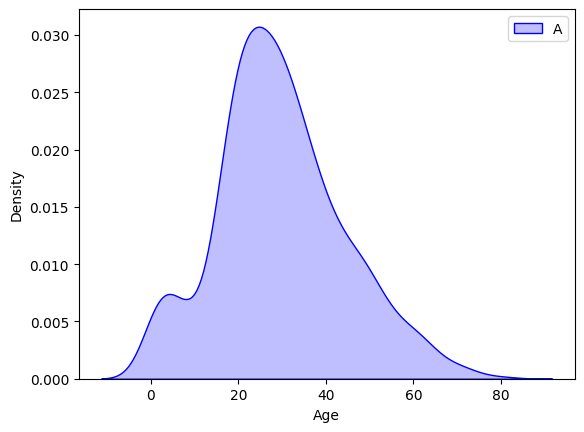

In [7]:
sns.kdeplot(df['Age'].dropna(), fill=True, color="b")
plt.legend(('Age'))
plt.show()

In [8]:
# Perform t-test and print result
t_result = stats.ttest_1samp(df['Age'].dropna(), 29)

# Test significance
alpha = 0.05
if (t_result[1] < alpha):
    print(f"mean value of Sample A differs from given value \np-value: {t_result[1]}")
else:
    print(f"No significant difference found \np-value: {t_result[1]}")

No significant difference found 
p-value: 0.19886311629507844


In [31]:
sampleA = df.loc[df['Sex'] == 'male','Age'].dropna().sample(30, random_state=20)
sampleB = df.loc[df['Sex'] == 'female','Age'].dropna().sample(30, random_state=20)

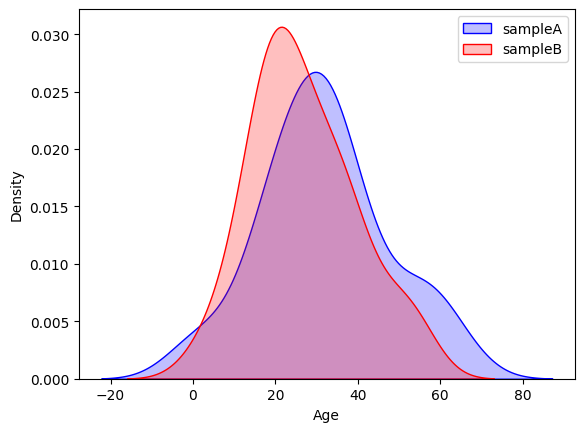

In [32]:
sns.kdeplot(sampleA, fill=True, color="b")
sns.kdeplot(sampleB, fill=True, color="r")
plt.legend(('sampleA', 'sampleB'))
plt.show()

In [33]:
t_result = stats.ttest_ind(sampleA, sampleB)

alpha = 0.05
if (t_result[1] < alpha):
     print(f"mean value of Sample A differs from Sample B \np-value: {t_result[1]}")
     print(f"mean value of Sample A: {sampleA.mean()}")
     print(f"mean value of Sample B: {sampleB.mean()}")
else:
    print(f"No significant difference found \np-value: {t_result[1]}")
    

No significant difference found 
p-value: 0.17606123355796455
